In [273]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.pyplot as plt
import pickle

In [274]:
with open("data/4p35.pkl", "rb") as rdr:
    results = pickle.load(rdr)
len(results)

12

In [275]:

def to_df(results):
    dfs = []
    cols = ["Loss", "RMS", "yaw", "pitch", "roll", "x", "y", "z"]
    for i, result in enumerate(results):
        df = pd.DataFrame(np.column_stack(result), columns=cols)
        df["Rep"] = i
        df["Run"] = list(range(len(result[0])))
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

df = to_df(results)
df

,Loss,RMS,yaw,pitch,roll,x,y,z,Rep,Run
0,1.852668,0.170970,0.600000,0.100000,0.200000,-0.500000,-0.500000,-4.000000,0,0
1,1.875047,0.118015,0.569056,0.130944,0.169056,-0.681125,-0.608675,-2.566316,0,1
2,0.718790,0.094021,0.641608,0.203496,0.096504,-0.453283,-0.411212,-1.938599,0,2
3,0.603741,0.081508,0.675765,0.169338,0.062347,-0.335075,-0.293004,-1.596505,0,3
4,0.736950,0.073905,0.659357,0.152930,0.078755,-0.281557,-0.221646,-1.404484,0,4
...,...,...,...,...,...,...,...,...,...,...
607,0.259825,0.031977,0.133577,0.198093,-0.173609,-0.115535,-0.078675,-0.610764,11,46
608,0.299658,0.031065,0.128720,0.193236,-0.168752,-0.093685,-0.078675,-0.596142,11,47
609,0.356675,0.030703,0.129551,0.192405,-0.167921,-0.115607,-0.078675,-0.581656,11,48
610,0.388223,0.029913,0.118650,0.181504,-0.178821,-0.093613,-0.078675,-0.567301,11,49


In [276]:
dfs = []
for rep, grp in df.groupby("Rep"):
    grp["Normalized Loss"] = grp["Loss"] / grp["Loss"].iloc[0]
    grp["Normalized RMS"] = grp["RMS"] / grp["RMS"].iloc[0]
    dfs.append(grp)
df = pd.concat(dfs, ignore_index=True)
df

,Loss,RMS,yaw,pitch,roll,x,y,z,Rep,Run,Normalized Loss,Normalized RMS
0,1.852668,0.170970,0.600000,0.100000,0.200000,-0.500000,-0.500000,-4.000000,0,0,1.000000,1.000000
1,1.875047,0.118015,0.569056,0.130944,0.169056,-0.681125,-0.608675,-2.566316,0,1,1.012079,0.690263
2,0.718790,0.094021,0.641608,0.203496,0.096504,-0.453283,-0.411212,-1.938599,0,2,0.387975,0.549925
3,0.603741,0.081508,0.675765,0.169338,0.062347,-0.335075,-0.293004,-1.596505,0,3,0.325876,0.476739
4,0.736950,0.073905,0.659357,0.152930,0.078755,-0.281557,-0.221646,-1.404484,0,4,0.397778,0.432268
...,...,...,...,...,...,...,...,...,...,...,...,...
607,0.259825,0.031977,0.133577,0.198093,-0.173609,-0.115535,-0.078675,-0.610764,11,46,0.158071,0.187031
608,0.299658,0.031065,0.128720,0.193236,-0.168752,-0.093685,-0.078675,-0.596142,11,47,0.182304,0.181701
609,0.356675,0.030703,0.129551,0.192405,-0.167921,-0.115607,-0.078675,-0.581656,11,48,0.216992,0.179578
610,0.388223,0.029913,0.118650,0.181504,-0.178821,-0.093613,-0.078675,-0.567301,11,49,0.236185,0.174963


In [277]:

df_thetas = df.melt(["Loss", "Normalized Loss", "RMS", "Normalized RMS", "Rep", "Run"])
df_thetas

,Loss,Normalized Loss,RMS,Normalized RMS,Rep,Run,variable,value
0,1.852668,1.000000,0.170970,1.000000,0,0,yaw,0.600000
1,1.875047,1.012079,0.118015,0.690263,0,1,yaw,0.569056
2,0.718790,0.387975,0.094021,0.549925,0,2,yaw,0.641608
3,0.603741,0.325876,0.081508,0.476739,0,3,yaw,0.675765
4,0.736950,0.397778,0.073905,0.432268,0,4,yaw,0.659357
...,...,...,...,...,...,...,...,...
3667,0.259825,0.158071,0.031977,0.187031,11,46,z,-0.610764
3668,0.299658,0.182304,0.031065,0.181701,11,47,z,-0.596142
3669,0.356675,0.216992,0.030703,0.179578,11,48,z,-0.581656
3670,0.388223,0.236185,0.029913,0.174963,11,49,z,-0.567301


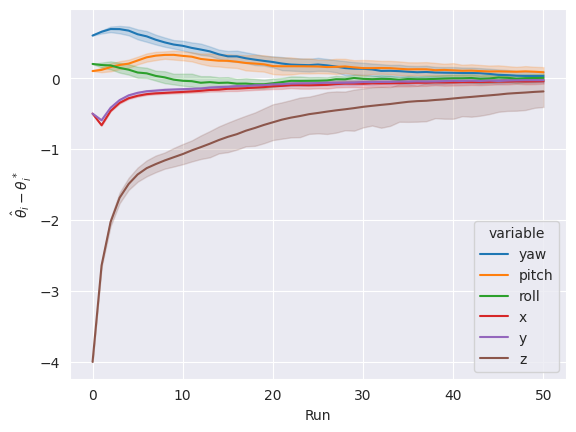

In [278]:
with sns.axes_style("darkgrid"):
    sns.lineplot(df_thetas, x="Run", y="value", hue="variable")
    plt.gca().set_ylabel(r"$\hat{\theta}_i - \theta^*_i$")

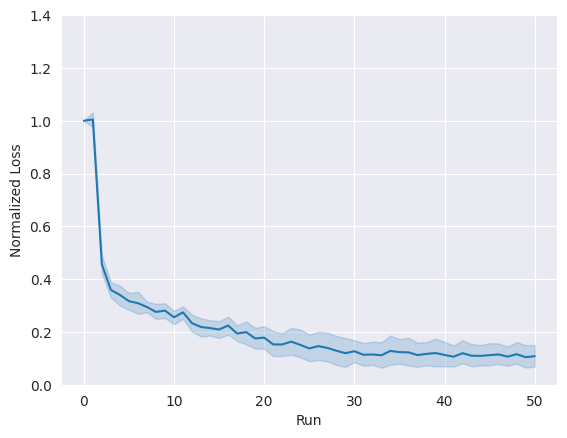

In [279]:
with sns.axes_style("darkgrid"):
    sns.lineplot(df, x="Run", y="Normalized Loss")
    plt.gca().set_ylim([0, 1.4])

<Axes: xlabel='Run', ylabel='Normalized RMS'>

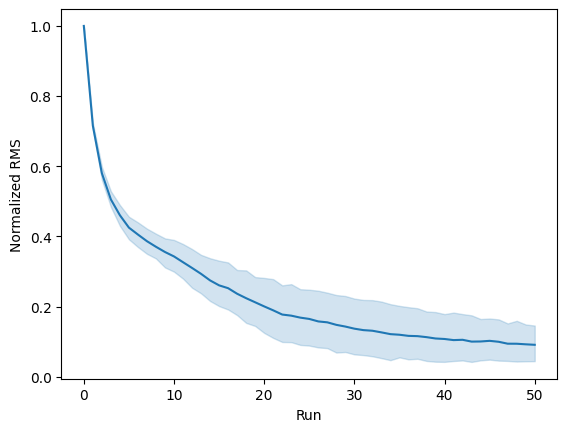

In [280]:
sns.lineplot(df, x="Run", y="Normalized RMS")